# 📚 Project Based Learning (PBL)
## Integrasi Big Data, Blockchain, AI, dan Machine Learning dalam Kajian Sastra Indonesia

Notebook ini mencakup:
- Ekstraksi teks dari gambar menggunakan OCR
- Normalisasi ejaan lama ke ejaan baru
- Klasifikasi genre sastra menggunakan Machine Learning
- Simulasi Blockchain untuk distribusi karya sastra
- Visualisasi data sastra Indonesia


In [10]:
# ✅ Instalasi pustaka yang dibutuhkan
!pip install pytesseract pillow matplotlib scikit-learn
!pip install pytesseract pillow matplotlib scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import os
import pytesseract
from PIL import Image

# Path ke Tesseract
pytesseract.pytesseract.tesseract_cmd = r"D:\SOFTWARE\Tesseract\tesseract.exe"

# Set TESSDATA_PREFIX ke folder tempat ind.traineddata disimpan
os.environ['TESSDATA_PREFIX'] = r"D:\SOFTWARE\Tesseract\tessdata"

# OCR
img = Image.open("halaman_buku.jpg")
teks = pytesseract.image_to_string(img, lang='ind')
print(teks)


Puisi Aku

Kalau sampai waktuku
“Ku mau tak seorang kan merayu
Tidak juga kau

Tak perlu sedu sedan itu

Aku ini binatang jalang

Dari kumpulannya terbuang
Biar peluru menembus kulitku
Aku tetap meradang menerjang
Luka dan bisa kubawa berlari
Berlari

Hingga hilang pedih peri

Dan aku akan lebih tidak peduli

Aku mau hidup seribu tahun lagi



In [14]:
# 🔤 Normalisasi ejaan lama ke ejaan baru
mapping = {
    'dj': 'j',
    'tj': 'c',
    'oe': 'u',
    'nj': 'ny',
    'sj': 'sy',
    'ch': 'kh'
}

for lama, baru in mapping.items():
    teks = teks.replace(lama, baru)

print(teks)


Puisi Aku

Kalau sampai waktuku
“Ku mau tak seorang kan merayu
Tidak juga kau

Tak perlu sedu sedan itu

Aku ini binatang jalang

Dari kumpulannya terbuang
Biar peluru menembus kulitku
Aku tetap meradang menerjang
Luka dan bisa kubawa berlari
Berlari

Hingga hilang pedih peri

Dan aku akan lebih tidak peduli

Aku mau hidup seribu tahun lagi



In [18]:
# 1. Tambah dataset agar model belajar lebih baik
corpus_teks = [
    # Puisi
    "Aku adalah api yang membakar jiwamu...",
    "Langit menangis bersama rinduku...",
    "Sajak sunyi di balik malam...",
    "Bayangmu menari di antara bintang...",
    # Drama
    "Dialog antara dua insan di balik tirai waktu...",
    "Mengapa kau tinggalkan aku, tanya si wanita tua...",
    "Kita tak bisa kembali, kata si anak sambil menatap nanar...",
    "Kau berdusta, teriaknya sambil memukul meja...",
    # Prosa
    "Ia berjalan menuju pasar sambil membawa secarik kertas...",
    "Pagi itu hujan turun perlahan, membasahi jalanan yang lengang...",
    "Ia membuka buku harian dengan tangan gemetar...",
    "Sebuah surat lama ditemukan di bawah lantai kayu..."
]

label_genre = [
    'Puisi', 'Puisi', 'Puisi', 'Puisi',
    'Drama', 'Drama', 'Drama', 'Drama',
    'Prosa', 'Prosa', 'Prosa', 'Prosa'
]

# 2. Preprocessing lebih baik (opsional, misal lowercase)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Fungsi lowercase
def to_lowercase(docs):
    return np.char.lower(docs)

# 3. Buat pipeline model
model = Pipeline([
    ('lowercase', FunctionTransformer(to_lowercase)),
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),  # unigram + bigram
    ('clf', MultinomialNB())
])

# 4. Fit model
model.fit(corpus_teks, label_genre)

# 5. Prediksi teks OCR
hasil_prediksi = model.predict([teks])
print("Prediksi genre:", hasil_prediksi[0])


Prediksi genre: Drama


In [16]:
# 🔗 Simulasi Blockchain untuk distribusi karya sastra
import hashlib, time

class Block:
    def __init__(self, index, data, prev_hash):
        self.index = index
        self.timestamp = time.time()
        self.data = data
        self.prev_hash = prev_hash
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        return hashlib.sha256(f"{self.index}{self.timestamp}{self.data}{self.prev_hash}".encode()).hexdigest()

class Blockchain:
    def __init__(self):
        self.chain = [Block(0, "Genesis Block", "0")]

    def add_block(self, data):
        prev_hash = self.chain[-1].hash
        new_block = Block(len(self.chain), data, prev_hash)
        self.chain.append(new_block)

bc = Blockchain()
bc.add_block("Jual buku A, harga 100K, penulis X, royalti 10%")
for block in bc.chain:
    print(vars(block))

{'index': 0, 'timestamp': 1749287185.771323, 'data': 'Genesis Block', 'prev_hash': '0', 'hash': '1c38540d0becfe95d7d5e6c34a62cace7debea609abe07a755feddd947be07b3'}
{'index': 1, 'timestamp': 1749287185.771323, 'data': 'Jual buku A, harga 100K, penulis X, royalti 10%', 'prev_hash': '1c38540d0becfe95d7d5e6c34a62cace7debea609abe07a755feddd947be07b3', 'hash': 'b921d0eecbc28aac250d300e355e72019f901b8bb1c9493de3fcefbc299b26f5'}


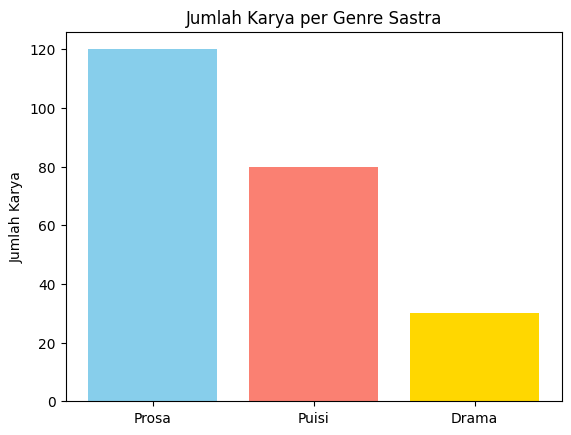

In [17]:
# 📊 Visualisasi data karya sastra
import matplotlib.pyplot as plt

genre = ['Prosa', 'Puisi', 'Drama']
jumlah = [120, 80, 30]

plt.bar(genre, jumlah, color=['skyblue', 'salmon', 'gold'])
plt.title('Jumlah Karya per Genre Sastra')
plt.ylabel('Jumlah Karya')
plt.show()